Using mps device
Wrapping the env in a VecTransposeImage.


/Users/ashishlama/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 5.53GB > 1.39GB
  warnings.warn(


Timesteps: 500, Average Reward: [-93.29116]
New best model saved with average reward: [-93.29116]
Timesteps: 1000, Average Reward: [-93.08618]
New best model saved with average reward: [-93.08618]
Timesteps: 1500, Average Reward: [-93.154175]
Timesteps: 2000, Average Reward: [-93.38465]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -53.3    |
| time/              |          |
|    fps             | 5        |
|    iterations      | 1        |
|    time_elapsed    | 380      |
|    total_timesteps | 2048     |
---------------------------------
Timesteps: 2500, Average Reward: [19.067585]
New best model saved with average reward: [19.067585]
Timesteps: 3000, Average Reward: [13.770529]
Timesteps: 3500, Average Reward: [30.868637]
New best model saved with average reward: [30.868637]
Timesteps: 4000, Average Reward: [14.488396]
-----------------------------------------
| rollout/                |             |


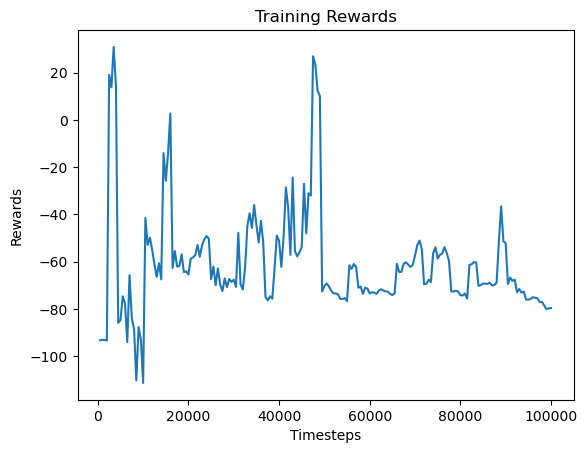

: 

In [8]:
import gym
import torch
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import BaseCallback
import matplotlib.pyplot as plt
from stable_baselines3.common.buffers import ReplayBuffer

# Check if MPS is available and set the device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Create the CarRacing-v2 environment with continuous actions
env = make_vec_env('CarRacing-v2', n_envs=1, env_kwargs={'continuous': True})

# Initialize the PPO agent
model = PPO('MlpPolicy', env, verbose=1, device=device)

# Define a custom callback to store results and save the best model
class CustomEvalCallback(BaseCallback):
    def __init__(self, eval_env, eval_freq, log_path, best_model_path, **kwargs):
        super(CustomEvalCallback, self).__init__(**kwargs)
        self.eval_env = eval_env
        self.eval_freq = eval_freq
        self.log_path = log_path
        self.best_model_path = best_model_path
        self.results = {'Steps': [], 'AvgReturn': []}
        self.timesteps = 0
        self.best_reward = -float('inf')  # Initialize with a very low value

    def _on_step(self) -> bool:
        self.timesteps += 1
        if self.timesteps % self.eval_freq == 0:
            # Evaluate the model
            total_reward = 0
            num_episodes = 10  # Number of episodes for evaluation
            for _ in range(num_episodes):
                obs = self.eval_env.reset()
                done = False
                while not done:
                    action, _states = self.model.predict(obs, deterministic=True)
                    obs, reward, done, _ = self.eval_env.step(action)
                    total_reward += reward
            
            average_reward = total_reward / num_episodes
            self.results['Steps'].append(self.timesteps)
            self.results['AvgReturn'].append(average_reward)
            print(f"steps: {self.timesteps}, AvgReturn: {average_reward}")
            
            # Save the best model
            if average_reward > self.best_reward:
                self.best_reward = average_reward
                self.model.save(self.best_model_path)
                print(f"New best model saved with average reward: {average_reward}")
        
        return True

# Separate evaluation environment
eval_env = make_vec_env('CarRacing-v2', n_envs=1, env_kwargs={'continuous': True})

# Callback to evaluate and log the rewards and save the best model
custom_eval_callback = CustomEvalCallback(
    eval_env=eval_env, 
    eval_freq=500, 
    log_path='/Users/ashishlama/Desktop/Ashish/Dessertation/Q102024355_AL_ CarRacing-v2_main',  # Corrected file path
    best_model_path="best_ppo_carracing_continuous"  # Changed to reflect PPO
)

# Initialize the ReplayBuffer
replay_buffer = ReplayBuffer(
    buffer_size=int(1e5),
    observation_space=env.observation_space,
    action_space=env.action_space,
    device=device,
    optimize_memory_usage=False  # Set to False to avoid the ValueError
)

# Train the agent
model.learn(total_timesteps=2e10, callback=custom_eval_callback)

# Save the final model
model.save("ppo_carracing_continuous")

# Plot the rewards
plt.plot(custom_eval_callback.results['Steps'], custom_eval_callback.results['AvgReturn'])
plt.xlabel('Steps')
plt.ylabel('AvgReturn')
plt.title('Training Rewards')
plt.savefig('PPO_training_plot.pdf')
plt.show()

# Test the trained agent
obs = env.reset()
for _ in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render(mode='human')
env.close()

In [3]:
import gym
import torch
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import BaseCallback
import matplotlib.pyplot as plt
from stable_baselines3.common.buffers import ReplayBuffer

# Check if MPS is available and set the device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Create the CarRacing-v2 environment with continuous actions
env = make_vec_env('CarRacing-v2', n_envs=1, env_kwargs={'continuous': True})

# Initialize the PPO agent
model = PPO('MlpPolicy', env, verbose=1, device=device)

# Define a custom callback to store results and save the best model
class CustomEvalCallback(BaseCallback):
    def __init__(self, eval_env, eval_freq, log_path, best_model_path, **kwargs):
        super(CustomEvalCallback, self).__init__(**kwargs)
        self.eval_env = eval_env
        self.eval_freq = eval_freq
        self.log_path = log_path
        self.best_model_path = best_model_path
        self.results = {'Steps': [], 'AvgReturn': []}
        self.timesteps = 0
        self.best_reward = -float('inf')  # Initialize with a very low value

    def _on_step(self) -> bool:
        self.timesteps += 1
        if self.timesteps % self.eval_freq == 0:
            # Evaluate the model
            total_reward = 0
            num_episodes = 10  # Number of episodes for evaluation
            for _ in range(num_episodes):
                obs = self.eval_env.reset()
                done = False
                while not done:
                    action, _states = self.model.predict(obs, deterministic=True)
                    obs, reward, done, _ = self.eval_env.step(action)
                    total_reward += reward
            
            average_reward = total_reward / num_episodes
            self.results['Steps'].append(self.timesteps)
            self.results['AvgReturn'].append(average_reward)
            print(f"Steps: {self.timesteps}, AvgReturn: {average_reward}")
            
            # Save the best model
            if average_reward > self.best_reward:
                self.best_reward = average_reward
                self.model.save(self.best_model_path)
                print(f"New best model saved with average Return: {average_reward}")
        
        return True

# Separate evaluation environment
eval_env = make_vec_env('CarRacing-v2', n_envs=1, env_kwargs={'continuous': True})

# Callback to evaluate and log the rewards and save the best model
custom_eval_callback = CustomEvalCallback(
    eval_env=eval_env, 
    eval_freq=500, 
    log_path='/Users/ashishlama/Desktop/Ashish/Dessertation/Q102024355_AL_ CarRacing-v2_main',  # Corrected file path
    best_model_path="best_ppo_carracing_continuous"  # Changed to reflect PPO
)

# Initialize the ReplayBuffer
replay_buffer = ReplayBuffer(
    buffer_size=int(1e5),
    observation_space=env.observation_space,
    action_space=env.action_space,
    device=device,
    optimize_memory_usage=False  # Set to False to avoid the ValueError
)

# Train the agent
model.learn(total_timesteps=int(2e6), callback=custom_eval_callback)

# Save the final model
model.save("ppo_carracing_continuous")

# Plot the rewards
plt.plot(custom_eval_callback.results['Steps'], custom_eval_callback.results['AvgReturn'])
plt.xlabel('Steps')
plt.ylabel('AvgReturn')
plt.title('AvgReturns Vs Steps')
plt.savefig('PPO_training_plot.pdf')
plt.show()

# Test the trained agent
obs = env.reset()
for _ in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render(mode='human')
env.close()

Using mps device
Wrapping the env in a VecTransposeImage.


/Users/ashishlama/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 5.53GB > 1.07GB
  warnings.warn(


Steps: 500, AvgReturn: [-93.32655]
New best model saved with average Return: [-93.32655]
Steps: 1000, AvgReturn: [-92.97212]
New best model saved with average Return: [-92.97212]
Steps: 1500, AvgReturn: [-92.948784]
New best model saved with average Return: [-92.948784]
Steps: 2000, AvgReturn: [-93.2349]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -59      |
| time/              |          |
|    fps             | 2        |
|    iterations      | 1        |
|    time_elapsed    | 781      |
|    total_timesteps | 2048     |
---------------------------------
Steps: 2500, AvgReturn: [27.308636]
New best model saved with average Return: [27.308636]
Steps: 3000, AvgReturn: [48.885986]
New best model saved with average Return: [48.885986]
Steps: 3500, AvgReturn: [75.958565]
New best model saved with average Return: [75.958565]
Steps: 4000, AvgReturn: [31.217098]
-----------------------------------------
| roll

: 

In [4]:
import gym
import torch
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import BaseCallback
import matplotlib.pyplot as plt
from stable_baselines3.common.buffers import ReplayBuffer

# Check if MPS is available and set the device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Create the CarRacing-v2 environment with continuous actions
env = make_vec_env('CarRacing-v2', n_envs=1, env_kwargs={'continuous': True})

# Initialize the PPO agent
model = PPO('MlpPolicy', env, verbose=1, device=device)

# Define a custom callback to store results and save the best model
class CustomEvalCallback(BaseCallback):
    def __init__(self, eval_env, eval_freq, log_path, best_model_path, **kwargs):
        super(CustomEvalCallback, self).__init__(**kwargs)
        self.eval_env = eval_env
        self.eval_freq = eval_freq
        self.log_path = log_path
        self.best_model_path = best_model_path
        self.results = {'Steps': [], 'AvgReturn': []}
        self.timesteps = 0
        self.best_reward = -float('inf')  # Initialize with a very low value

    def _on_step(self) -> bool:
        self.timesteps += 1
        if self.timesteps % self.eval_freq == 0:
            # Evaluate the model
            total_reward = 0
            num_episodes = 10  # Number of episodes for evaluation
            for _ in range(num_episodes):
                obs = self.eval_env.reset()
                done = False
                while not done:
                    action, _states = self.model.predict(obs, deterministic=True)
                    obs, reward, done, _ = self.eval_env.step(action)
                    total_reward += reward
            
            average_reward = total_reward / num_episodes
            self.results['Steps'].append(self.timesteps)
            self.results['AvgReturn'].append(average_reward)
            print(f"Steps: {self.timesteps}, AvgReturn: {average_reward}")
            
            # Save the best model
            if average_reward > self.best_reward:
                self.best_reward = average_reward
                self.model.save(self.best_model_path)
                print(f"New best model saved with average Return: {average_reward}")
        
        return True

# Separate evaluation environment
eval_env = make_vec_env('CarRacing-v2', n_envs=1, env_kwargs={'continuous': True})

# Callback to evaluate and log the rewards and save the best model
custom_eval_callback = CustomEvalCallback(
    eval_env=eval_env, 
    eval_freq=500, 
    log_path='/Users/ashishlama/Desktop/Ashish/Dessertation/Q102024355_AL_ CarRacing-v2_main',  # Corrected file path
    best_model_path="best_ppo_carracing_continuous"  # Changed to reflect PPO
)

# Initialize the ReplayBuffer
replay_buffer = ReplayBuffer(
    buffer_size=10000,
    observation_space=env.observation_space,
    action_space=env.action_space,
    device=device,
    optimize_memory_usage=False  # Set to False to avoid the ValueError
)

# Train the agent
model.learn(total_timesteps=int(2e6), callback=custom_eval_callback)

# Save the final model
model.save("ppo_carracing_continuous")

# Plot the rewards
plt.plot(custom_eval_callback.results['Steps'], custom_eval_callback.results['AvgReturn'])
plt.xlabel('Step')
plt.ylabel('AvgReturn')
plt.title('AvgReturns Vs Steps')
plt.savefig('PPO_training_plot.pdf')
plt.show()

# Test the trained agent
obs = env.reset()
for _ in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render(mode='rgb_array')
env.close()

Using mps device
Wrapping the env in a VecTransposeImage.
Steps: 500, AvgReturn: [-77.65091]
New best model saved with average Return: [-77.65091]
Steps: 1000, AvgReturn: [-83.5193]
Steps: 1500, AvgReturn: [-92.178024]
Steps: 2000, AvgReturn: [-82.56894]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -55.1    |
| time/              |          |
|    fps             | 3        |
|    iterations      | 1        |
|    time_elapsed    | 517      |
|    total_timesteps | 2048     |
---------------------------------
Steps: 2500, AvgReturn: [30.352402]
New best model saved with average Return: [30.352402]
Steps: 3000, AvgReturn: [31.03043]
New best model saved with average Return: [31.03043]
Steps: 3500, AvgReturn: [6.74397]
Steps: 4000, AvgReturn: [24.347544]
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -55

: 

Using mps device
Wrapping the env in a VecTransposeImage.


/Users/ashishlama/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 5.53GB > 0.76GB
  warnings.warn(


Steps: 500, AvgReturn: [-25.610653]
New best model saved with average Return: [-25.610653]
Steps: 1000, AvgReturn: [-3.9940174]
New best model saved with average Return: [-3.9940174]
Steps: 1500, AvgReturn: [-19.798183]
Steps: 2000, AvgReturn: [-11.931172]
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -50.6    |
| time/              |          |
|    fps             | 2        |
|    iterations      | 1        |
|    time_elapsed    | 683      |
|    total_timesteps | 2048     |
---------------------------------
Steps: 2500, AvgReturn: [-69.185356]
Steps: 3000, AvgReturn: [-68.500404]
Steps: 3500, AvgReturn: [-68.8137]
Steps: 4000, AvgReturn: [-68.72612]
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -50.3       |
| time/                   |             |
|    fps                  | 4           |
|    i

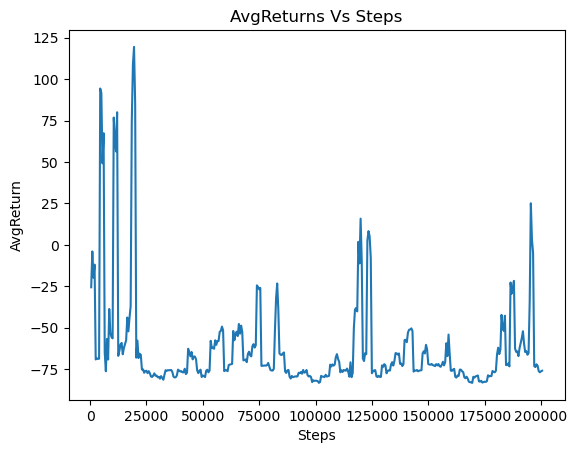

: 

In [1]:
import gym
import torch
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import BaseCallback
import matplotlib.pyplot as plt
from stable_baselines3.common.buffers import ReplayBuffer

# Check if MPS is available and set the device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Create the CarRacing-v2 environment with continuous actions
env = make_vec_env('CarRacing-v2', n_envs=1, env_kwargs={'continuous': True})

# Initialize the PPO agent
model = PPO('MlpPolicy', env, verbose=1, device=device)

# Define a custom callback to store results and save the best model
class CustomEvalCallback(BaseCallback):
    def __init__(self, eval_env, eval_freq, log_path, best_model_path, **kwargs):
        super(CustomEvalCallback, self).__init__(**kwargs)
        self.eval_env = eval_env
        self.eval_freq = eval_freq
        self.log_path = log_path
        self.best_model_path = best_model_path
        self.results = {'Steps': [], 'AvgReturn': []}
        self.timesteps = 0
        self.best_reward = -float('inf')  # Initialize with a very low value

    def _on_step(self) -> bool:
        self.timesteps += 1
        if self.timesteps % self.eval_freq == 0:
            # Evaluate the model
            total_reward = 0
            num_episodes = 10  # Number of episodes for evaluation
            for _ in range(num_episodes):
                obs = self.eval_env.reset()
                done = False
                while not done:
                    action, _states = self.model.predict(obs, deterministic=True)
                    obs, reward, done, _ = self.eval_env.step(action)
                    total_reward += reward
            
            average_reward = total_reward / num_episodes
            self.results['Steps'].append(self.timesteps)
            self.results['AvgReturn'].append(average_reward)
            print(f"Steps: {self.timesteps}, AvgReturn: {average_reward}")
            
            # Save the best model
            if average_reward > self.best_reward:
                self.best_reward = average_reward
                self.model.save(self.best_model_path)
                print(f"New best model saved with average Return: {average_reward}")
        
        return True

# Separate evaluation environment
eval_env = make_vec_env('CarRacing-v2', n_envs=1, env_kwargs={'continuous': True})

# Callback to evaluate and log the rewards and save the best model
custom_eval_callback = CustomEvalCallback(
    eval_env=eval_env, 
    eval_freq=500, 
    log_path='/Users/ashishlama/Desktop/Ashish/Dessertation/Q102024355_AL_ CarRacing-v2_main',  # Corrected file path
    best_model_path="best_ppo_carracing_continuous"  # Changed to reflect PPO
)

# Initialize the ReplayBuffer
replay_buffer = ReplayBuffer(
    buffer_size=int(1e5),
    observation_space=env.observation_space,
    action_space=env.action_space,
    device=device,
    optimize_memory_usage=False  # Set to False to avoid the ValueError
)

# Train the agent
model.learn(total_timesteps=200000, callback=custom_eval_callback)

# Save the final model
model.save("ppo_carracing_continuous")

# Plot the rewards
plt.plot(custom_eval_callback.results['Steps'], custom_eval_callback.results['AvgReturn'])
plt.xlabel('Steps')
plt.ylabel('AvgReturn')
plt.title('AvgReturns Vs Steps')
plt.savefig('PPO_training_plot.pdf')
plt.show()

# Test the trained agent
obs = env.reset()
for _ in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render(mode='human')
env.close()